In [9]:
import pandas as pd

# Especificar la ruta del archivo
ruta_archivo = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame
print("Contenido del archivo:")
print(df.head())

Contenido del archivo:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [28]:

# Mostrar las primeras filas del DataFrame original
print("Contenido original del archivo:")
print(df.head())

# Identificar duplicados (filas idénticas) y guardarlos en un DataFrame separado
duplicados = df[df.duplicated(keep=False)]  # 'keep=False' incluye todas las ocurrencias duplicadas
print("\nDuplicados encontrados:")
print(duplicados)

# Guardar los duplicados en un archivo nuevo para análisis
ruta_duplicados = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_DUPLICADOS.xlsx'
duplicados.to_excel(ruta_duplicados, index=False)
print("\nDuplicados guardados en:", ruta_duplicados)

# Eliminar duplicados manteniendo solo la primera ocurrencia
df_limpio = df.drop_duplicates(keep='first')  # 'keep="first"' asegura que se conserva la primera fila única
print("\nDatos después de eliminar duplicados:")
print(df_limpio.head())

# Guardar el DataFrame limpio en un nuevo archivo Excel
ruta_limpia = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_LIMPIO.xlsx'
df_limpio.to_excel(ruta_limpia, index=False)
print("\nDatos limpios guardados en:", ruta_limpia)

Contenido original del archivo:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  PrecioTotal  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  

Duplicados encontrados:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Descri

In [15]:
import pandas as pd

# Especificar la ruta del archivo
ruta_archivo = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo)

# Contar el número de filas antes de eliminar duplicados
filas_antes = len(df)

# Identificar duplicados y eliminarlos
df_limpio = df.drop_duplicates(keep='first')

# Contar el número de filas después de eliminar duplicados
filas_despues = len(df_limpio)

# Calcular cuántos datos se eliminaron
datos_eliminados = filas_antes - filas_despues

print(f"El número total de filas en el archivo original era: {filas_antes}")
print(f"El número total de filas después de eliminar duplicados es: {filas_despues}")
print(f"Se eliminaron {datos_eliminados} filas duplicadas.")

El número total de filas en el archivo original era: 541909
El número total de filas después de eliminar duplicados es: 536641
Se eliminaron 5268 filas duplicadas.


In [30]:
import pandas as pd

# Especificar la ruta del archivo limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_LIMPIO.xlsx'

# Leer el archivo Excel
df_limpio = pd.read_excel(ruta_archivo_limpio)

# Mostrar las primeras filas del DataFrame original
print("Contenido original del archivo:")
print(df_limpio.head())

# Separar la columna 'InvoiceDate' en dos columnas: Fecha y Hora
if 'InvoiceDate' in df_limpio.columns:
    # Convertir la columna 'InvoiceDate' al tipo datetime, si no lo está
    df_limpio['InvoiceDate'] = pd.to_datetime(df_limpio['InvoiceDate'])

    # Crear las nuevas columnas 'Fecha' y 'Hora'
    df_limpio['Fecha'] = df_limpio['InvoiceDate'].dt.date
    df_limpio['Hora'] = df_limpio['InvoiceDate'].dt.time

    # Eliminar la columna original si es necesario
    # df = df.drop(columns=['InvoiceDate'])  # Descomentar si quieres eliminar la columna original

print("\nContenido del DataFrame con columnas separadas:")
print(df_limpio.head())

# Guardar el DataFrame actualizado en un nuevo archivo Excel
ruta_guardado_final = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SEPARADO.xlsx'
df_limpio.to_excel(ruta_guardado_final, index=False)

print("\nDatos actualizados guardados en:", ruta_guardado_final)

Contenido original del archivo:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  PrecioTotal  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  

Contenido del DataFrame con columnas separadas:
  InvoiceNo StockCode         

In [ ]:
import pandas as pd

# Especificar la ruta del archivo limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_LIMPIO.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo_limpio)

# Asegurarse de que las columnas 'Cantidad' y 'Precio' existan
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    # Crear una nueva columna para el precio total de cada fila
    df['PrecioTotal'] = df['Quantity'] * df['UnitPrice']

    # Calcular el precio total de todos los registros
    precio_total = df['PrecioTotal'].sum()
    print(f"\nEl precio total de todos los registros es: {precio_total}")

    # Guardar el DataFrame actualizado con la columna 'PrecioTotal'
    ruta_guardado = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_CON_PRECIO_TOTAL.xlsx'
    df.to_excel(ruta_guardado, index=False)
    print("\nDatos con el precio total guardados en:", ruta_guardado)
else:
    print("\nLas columnas 'Quantity y 'UnitPrice' no existen en el archivo. Verifica los nombres de las columnas.")


El precio total de todos los registros es: 8278519.4240000015

Datos con el precio total guardados en: C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_CON_PRECIO_TOTAL.xlsx


In [19]:
import pandas as pd

# Especificar la ruta del archivo limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_CON_PRECIO_TOTAL.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo_limpio)

# Mostrar las primeras filas del DataFrame original
print("Contenido original del archivo:")
print(df.head())

# Eliminar filas donde 'Cantidad' o 'Precio' sean iguales a 0
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df = df[(df['Quantity'] != 0) & (df['UnitPrice'] != 0)]
    print("\nDatos después de eliminar filas con 0 en 'Cantidad' o 'Precio':")
    print(df.head())
else:
    print("\nLas columnas 'Quanty' y 'UnitPrice' no existen en el archivo. Verifica los nombres de las columnas.")

# Guardar el DataFrame limpio en un nuevo archivo Excel
ruta_guardado_final = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SIN_CEROS.xlsx'
df.to_excel(ruta_guardado_final, index=False)

print("\nDatos sin ceros guardados en:", ruta_guardado_final)

Contenido original del archivo:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  PrecioTotal  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        20.34  

Datos después de eliminar filas con 0 en 'Cantidad' o 'Precio':
  InvoiceNo St

In [38]:
import pandas as pd
import sqlite3

# Especificar la ruta del archivo Excel limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SEPARADO.xlsx'

# Leer el archivo Excel en un DataFrame
df_1= pd.read_excel(ruta_archivo_limpio)

# Conectar o crear una base de datos SQLite
conexion = sqlite3.connect(r'BASE_FINAL.db')

# Subir el DataFrame como una tabla SQLite
nombre_tabla = 'TABLA_FINAL'  # Puedes cambiar el nombre de la tabla
df.to_sql(nombre_tabla, conexion, if_exists='replace', index=False)

print(f"Datos subidos exitosamente a la tabla '{nombre_tabla}' en la base de datos SQLite.")

# Cerrar la conexión
conexion.close()

Datos subidos exitosamente a la tabla 'TABLA_FINAL' en la base de datos SQLite.


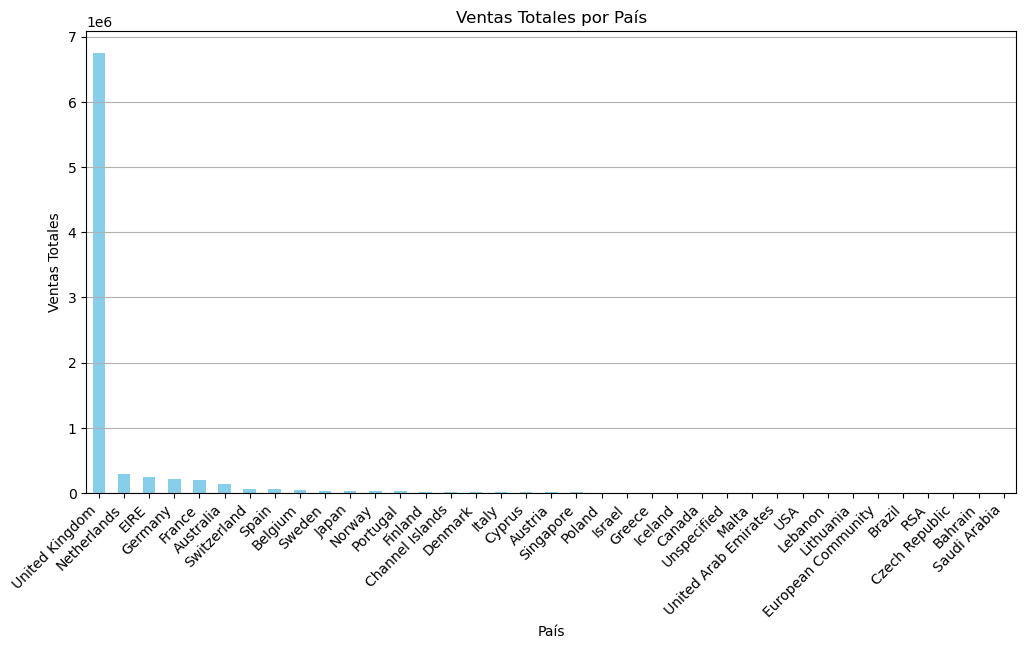


El gráfico de ventas por país se ha guardado en: C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Visualizaciones\ventas_por_pais.png


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Especificar la ruta del archivo Excel limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SEPARADO.xlsx'

# Leer el archivo Excel
df= pd.read_excel(ruta_archivo_limpio)

# Obtener el directorio del archivo Excel
directorio_base = os.path.dirname(ruta_archivo_limpio)

# Crear un subdirectorio para las visualizaciones dentro del mismo directorio del Excel
directorio_imagenes = os.path.join(directorio_base, 'Visualizaciones')
if not os.path.exists(directorio_imagenes):
    os.makedirs(directorio_imagenes)

### 1. Gráfico de barras: País con mayores ventas
# Agrupar datos por país y calcular las ventas totales
if 'Country' in df.columns and 'PrecioTotal' in df.columns:
    ventas_por_pais = df.groupby('Country')['PrecioTotal'].sum().sort_values(ascending=False)
    
    # Crear gráfico de barras
    plt.figure(figsize=(12, 6))
    ventas_por_pais.plot(kind='bar', color='skyblue')
    plt.title('Ventas Totales por País')
    plt.xlabel('País')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=45, ha='right')  # Girar nombres de países para mejor visualización
    plt.grid(axis='y')
    
    # Guardar el gráfico como imagen en el subdirectorio
    ruta_grafica = os.path.join(directorio_imagenes, 'ventas_por_pais.png')
    plt.savefig(ruta_grafica)
    plt.show()

    print("\nEl gráfico de ventas por país se ha guardado en:", ruta_grafica)
else:
    print("\nLas columnas 'Country' o 'TotalPrice' no existen en el archivo. Verifica los nombres de las columnas.")



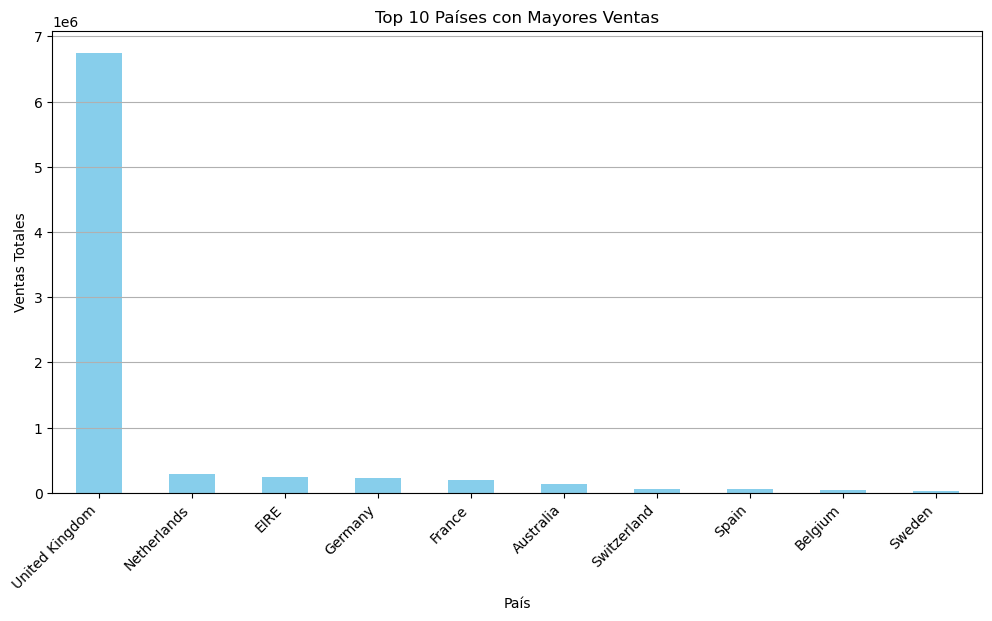


El gráfico de los Top 10 países con mayores ventas se ha guardado en: C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Visualizaciones\top_10_paises_mayores_ventas.png


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Especificar la ruta del archivo Excel limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_LIMPIO.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo_limpio)

# Obtener el directorio del archivo Excel
directorio_base = os.path.dirname(ruta_archivo_limpio)

# Crear un subdirectorio para las visualizaciones dentro del mismo directorio del Excel
directorio_imagenes = os.path.join(directorio_base, 'Visualizaciones')
if not os.path.exists(directorio_imagenes):
    os.makedirs(directorio_imagenes)

### 1. Gráfico de barras: Top 10 países con mayores ventas
if 'Country' in df.columns and 'PrecioTotal' in df.columns:
    # Agrupar datos por país y calcular las ventas totales
    ventas_por_pais = df.groupby('Country')['PrecioTotal'].sum().sort_values(ascending=False)

    # Filtrar solo los 10 países con mayores ventas
    top_10_paises = ventas_por_pais.head(10)
    
    # Crear gráfico de barras para los 10 países principales
    plt.figure(figsize=(12, 6))
    top_10_paises.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Países con Mayores Ventas')
    plt.xlabel('País')
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=45, ha='right')  # Girar nombres de países para mejor visualización
    plt.grid(axis='y')

    # Guardar el gráfico como imagen en el subdirectorio
    ruta_grafica = os.path.join(directorio_imagenes, 'top_10_paises_mayores_ventas.png')
    plt.savefig(ruta_grafica)
    plt.show()

    print("\nEl gráfico de los Top 10 países con mayores ventas se ha guardado en:", ruta_grafica)
else:
    print("\nLas columnas 'Country' o 'PrecioTotal' no existen en el archivo. Verifica los nombres de las columnas.")


Productos más vendidos en cada país:
                    Country                          Description  Quantity
287               Australia              MINI PAINT SET VINTAGE       2916
854                 Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
921                 Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
1348                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
1719                 Brazil                 DOLLY GIRL LUNCH BOX        24
1847                 Canada           RETRO COFFEE MUGS ASSORTED       504
2185        Channel Islands                         RAIN PONCHO        407
2527                 Cyprus       HEART DECORATION PAINTED ZINC        384
2853         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
3016                Denmark               RED  HARMONICA IN BOX        288
4271                   EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
5133     European Community       RED ROCKING HORSE HAND PAINT

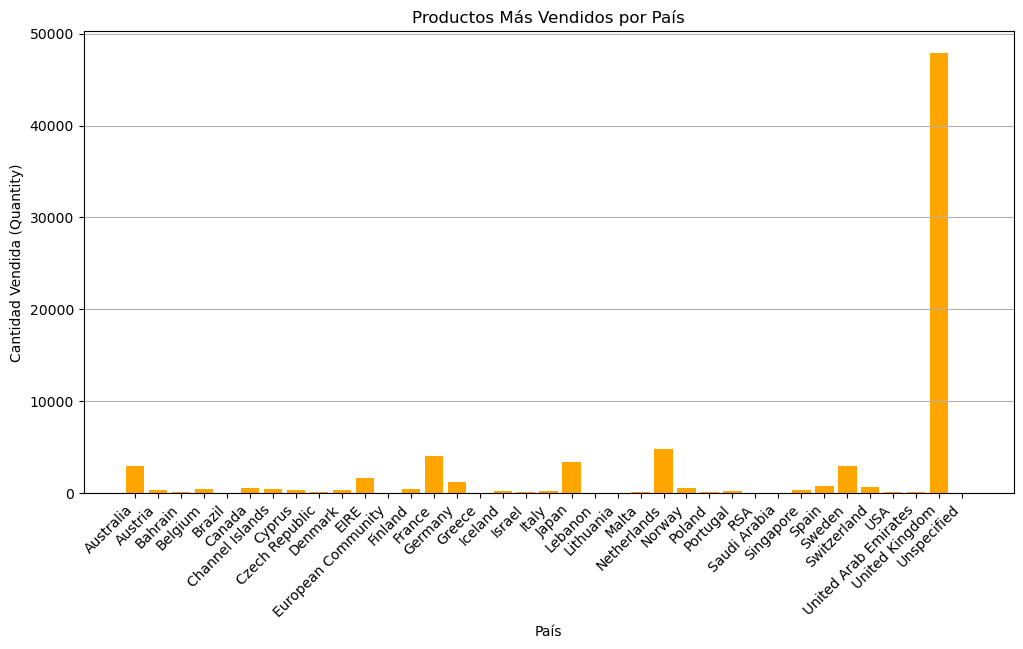


El gráfico de los productos más vendidos por país se ha guardado en: C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Visualizaciones\productos_mas_vendidos_por_pais.png


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Especificar la ruta del archivo Excel limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SEPARADO.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo_limpio)

# Obtener el directorio del archivo Excel
directorio_base = os.path.dirname(ruta_archivo_limpio)

# Crear un subdirectorio para las visualizaciones dentro del mismo directorio del Excel
directorio_imagenes = os.path.join(directorio_base, 'Visualizaciones')
if not os.path.exists(directorio_imagenes):
    os.makedirs(directorio_imagenes)

### Productos más vendidos por país usando 'Quality'
if 'Country' in df.columns and 'Quantity' in df.columns and 'Description' in df.columns:
    # Agrupar por país y producto, y calcular las cantidades totales vendidas
    productos_paises = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

    # Identificar el producto más vendido en cada país
    productos_top_paises = productos_paises.loc[productos_paises.groupby('Country')['Quantity'].idxmax()]

    # Mostrar los resultados
    print("\nProductos más vendidos en cada país:")
    print(productos_top_paises)

    # Crear gráfico de barras para los productos más vendidos por país
    plt.figure(figsize=(12, 6))
    plt.bar(productos_top_paises['Country'], productos_top_paises['Quantity'], color='orange')
    plt.title('Productos Más Vendidos por País')
    plt.xlabel('País')
    plt.ylabel('Cantidad Vendida (Quantity)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

    # Guardar el gráfico como imagen en el subdirectorio
    ruta_grafica_productos = os.path.join(directorio_imagenes, 'productos_mas_vendidos_por_pais.png')
    plt.savefig(ruta_grafica_productos)
    plt.show()

    print("\nEl gráfico de los productos más vendidos por país se ha guardado en:", ruta_grafica_productos)
else:
    print("\nLas columnas necesarias ('Country', 'Quantity', 'Description') no existen en el archivo. Verifica los nombres de las columnas.")


El mes con mayores ventas fue: 2011-11, con un total de 653976 productos vendidos.

Los productos más vendidos en el mes 2011-11 fueron:
                              Description  Quantity
1805                   RABBIT NIGHT LIGHT     12281
1774                       POPCORN HOLDER      8149
1596      PAPER CHAIN KIT 50'S CHRISTMAS       5869
1203              JUMBO BAG RED RETROSPOT      5575
159         ASSORTED COLOUR BIRD ORNAMENT      5155
...                                   ...       ...
727                              Discount       -12
1714            PINK METAL CHICKEN HEART        -24
913   FRIDGE MAGNETS LES ENFANTS ASSORTED       -33
912         FRIDGE MAGNETS LA VIE EN ROSE       -37
914      FRIDGE MAGNETS US DINER ASSORTED       -44

[2728 rows x 2 columns]


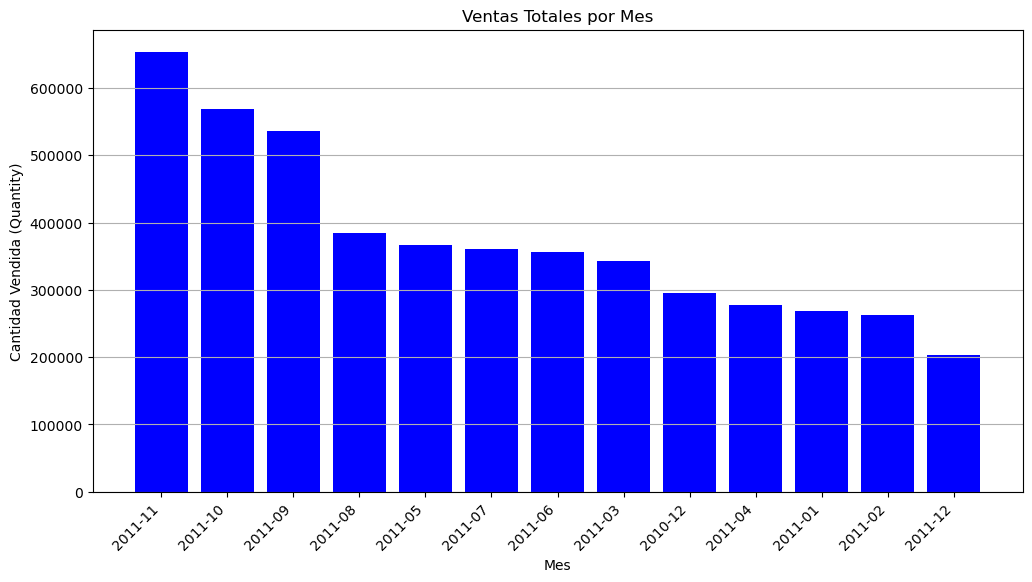


El gráfico de ventas por mes se ha guardado en: C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Visualizaciones\ventas_por_mes.png


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Especificar la ruta del archivo Excel limpio
ruta_archivo_limpio = r'C:\Users\Patricio\Documents\MAESTRIA\MODULO_2\Online Retail_SEPARADO.xlsx'

# Leer el archivo Excel
df = pd.read_excel(ruta_archivo_limpio)

# Asegurarse de que la columna 'Fecha' esté en formato datetime
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir a formato datetime si no lo está

# Crear una nueva columna para el mes
df['Mes'] = df['Fecha'].dt.to_period('M')  # Extraer el mes en formato "YYYY-MM"

# Validar que las columnas necesarias existan
if 'Mes' in df.columns and 'Quantity' in df.columns and 'Description' in df.columns:
    # Agrupar por mes y calcular las cantidades totales vendidas
    ventas_por_mes = df.groupby('Mes')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

    # Identificar el mes con mayores ventas
    mes_top = ventas_por_mes.iloc[0]['Mes']
    cantidad_top_mes = ventas_por_mes.iloc[0]['Quantity']
    print(f"\nEl mes con mayores ventas fue: {mes_top}, con un total de {cantidad_top_mes} productos vendidos.")

    # Filtrar los datos del mes con mayores ventas
    productos_top_mes = df[df['Mes'] == mes_top].groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

    print(f"\nLos productos más vendidos en el mes {mes_top} fueron:")
    print(productos_top_mes)

    # Crear gráfico para visualizar las ventas por mes
    plt.figure(figsize=(12, 6))
    plt.bar(ventas_por_mes['Mes'].astype(str), ventas_por_mes['Quantity'], color='blue')
    plt.title('Ventas Totales por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad Vendida (Quantity)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

    # Guardar el gráfico de ventas por mes
    directorio_base = os.path.dirname(ruta_archivo_limpio)
    directorio_imagenes = os.path.join(directorio_base, 'Visualizaciones')
    if not os.path.exists(directorio_imagenes):
        os.makedirs(directorio_imagenes)
    ruta_grafica_meses = os.path.join(directorio_imagenes, 'ventas_por_mes.png')
    plt.savefig(ruta_grafica_meses)
    plt.show()

    print("\nEl gráfico de ventas por mes se ha guardado en:", ruta_grafica_meses)

    # Crear gráfico de los productos más vendidos en el mes top
    #plt.figure(figsize=(12, 6))
    #plt.bar(productos_top_mes['Description'], productos_top_mes['Quantity'], color='orange')
    #plt.title(f'Productos Más Vendidos en el Mes {mes_top}')
    #plt.xlabel('Producto')
    #plt.ylabel('Cantidad Vendida')
    #plt.xticks(rotation=45, ha='right')
    #plt.grid(axis='y')

    # Guardar el gráfico de productos más vendidos
    #ruta_grafica_productos = os.path.join(directorio_imagenes, f'productos_mas_vendidos_{mes_top}.png')
    #plt.savefig(ruta_grafica_productos)
    #plt.show()

    #print(f"\nEl gráfico de los productos más vendidos en el mes {mes_top} se ha guardado en:", ruta_grafica_productos)
else:
    print("\nLas columnas necesarias ('Fecha', 'Quality', 'Description') no existen en el archivo. Por favor, verifica los nombres exactos en el archivo.")